# DS 2023 HW 13

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a brower, and the print the web page to PDF. <span style="color:red;font-weight:bold;">It is understood that your interactive visualization will not be transferred to the PDF</span>.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Sae-Jin Moon
- ID: rhn9qs

## Compliance with Homework Submission Guidelines

1 pt

## Overview

In this weeks homework, you will create interactive plots using IPyWidgets and [some medical insurance data from Kaggle](https://www.kaggle.com/datasets/saadaliyaseen/decoding-medical-costs-analyzing-insurance-data). The data set contains $1,338$ observations and $7$ features relating to the health insurance details of anonymous individuals from the US. 

The data set has the following features:

- `sex`: Two categories: male and female.
- `bmi`: Body Mass Index, ranges from about $15$ to $53$, indicating health/weight status.
- `children`: Number of dependents covered by the insurance, from $0$ to $5$.
- `smoker`: Two categories: `yes` (smoker) and `no` (non-smoker).
- `region`: Four categories: `northeast`, `northwest`, `southeast`, `southwest`.
- `charges`: Medical insurance cost billed to the individual, ranging from around $\$1,000$ to over $\$60,000$.

## Set Up

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import HTML

### Read in Data

In [2]:
INS = pd.read_csv("insurance.csv")
INS.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Tasks

### Task 1

2 pts

Create widgets for each feature in the data set. For each widget, use the information in the list below to choose the type of widget to create. For range slides, get the minimum and maximum values from the data set. 

- `age` : range slider
- `sex` : toggle buttons
- `bmi` : range slider
- `children`: range slider
- `smoker`: toggle buttons
- `region` : dropown list

Name each widget following the pattern `<feature_name>_widget`, e.g. `age_widget`.

Note: Some settings may produce the following message: `AttributeError: 'float' object has no attribute 'round'`. Disregard this.

In [3]:
age_widget = widgets.IntRangeSlider(
    min=INS['age'].min(), 
    max=INS['age'].max(), 
    description='Age'
)

sex_widget = widgets.ToggleButtons(
    options=INS['sex'].unique(), 
    description='Sex'
)

bmi_widget = widgets.FloatRangeSlider(
    min=INS['bmi'].min(), 
    max=INS['bmi'].max(), 
    description='BMI'
)

children_widget = widgets.IntRangeSlider(
    min=INS['children'].min(), 
    max=INS['children'].max(), 
    description='Children'
)

smoker_widget = widgets.ToggleButtons(
    options=INS['smoker'].unique(), 
    description='Smoker'
)

region_widget = widgets.Dropdown(
    options=INS['region'].unique(), 
    description='Region'
)

### Task 2

2 pts

Now create an interactive widget that takes user input for each of the variables for which you created a widget above. 

In the function, get the mean of the feature `charges` based on the values of the variables passed by the widgets. This will require creating a boolean expression passed to the data frame.

Note that the widgets for `age`, `bmi`, and `children` will return a tuple. You will use these tuples to create boolean expressions that get values `>=` to the first element and `<=` the second element.

Return the result as HTML using the tags `<span style="font-size:14pt;font-weight:bold;">Mean charges: ...</span>` to wrap your answer. For example, if you assign the mean BMI to the variable `mean_bmi`, this is how you would return an HMTL-formatted result:

```python
HTML(f"<span style='font-size:14pt;font-weight:bold;'>Mean charges: {mean_bmi}</span>")
```

In [4]:
def calculate_mean_charges(age, sex, bmi, children, smoker, region):
    filter_mask = (
        (INS['age'] >= age[0]) & (INS['age'] <= age[1]) &
        (INS['sex'] == sex) &
        (INS['bmi'] >= bmi[0]) & (INS['bmi'] <= bmi[1]) &
        (INS['children'] >= children[0]) & (INS['children'] <= children[1]) &
        (INS['smoker'] == smoker) &
        (INS['region'] == region)
    )
    
    filtered_df = INS[filter_mask]
    
    if not filtered_df.empty:
        mean_charges = round(filtered_df['charges'].mean(), 2)
    else:
        mean_charges = "No Data Found"
        
    return HTML(f"<span style='font-size:14pt;font-weight:bold;'>Mean charges: {mean_charges}</span>")

widgets.interact(calculate_mean_charges, 
                 age=age_widget, 
                 sex=sex_widget, 
                 bmi=bmi_widget, 
                 children=children_widget, 
                 smoker=smoker_widget, 
                 region=region_widget);

interactive(children=(IntRangeSlider(value=(29, 52), description='Age', max=64, min=18), ToggleButtons(descrip…

### Task 3

2 pts

Now create an interactive widget that meets the following requirements:

- Shows a line plot, using Seaborn's `relplot`, where `age` is plotted on the x axis and `bmi` is on the y axis.
- Input is controlled by the `age` and `bmi` widgets.
- The values of the arguments supplied by the widgets are used to filter the data set before plotting.
- Title the plot "BMI by Age".

Note: disregard any `UserWarning` messages you may get.

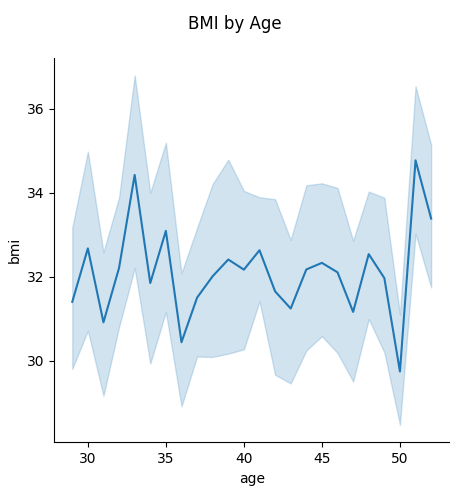

interactive(children=(IntRangeSlider(value=(29, 52), description='Age', max=64, min=18), FloatRangeSlider(valu…

In [5]:
def plot_bmi_by_age(age, bmi):
    filter_mask = (
        (INS['age'] >= age[0]) & (INS['age'] <= age[1]) &
        (INS['bmi'] >= bmi[0]) & (INS['bmi'] <= bmi[1])
    )
    filtered_df = INS[filter_mask]
    
    if not filtered_df.empty:
        g = sns.relplot(data=filtered_df, x='age', y='bmi', kind='line')
        g.fig.suptitle("BMI by Age")
        plt.show()
    else:
        print("No data matches the selected ranges.")

widgets.interact(plot_bmi_by_age, age=age_widget, bmi=bmi_widget);

### Task 4

2 pts

Create an interactive scatter plot (using `relplot`) the shows `age` on the x axis and `charges` on the y-axis. 

For this plot, create a dropdown list widget that lets the user choose which feature to use to set the `hue` of the scatter plot. The list should contain the following options: `sex`, `smoker`, `bmi`, `children`, and `region`.

Create a title that says "Charges by Age and <feature>", where <feature> is replaced by the name of the feature passed.

In [6]:
hue_widget = widgets.Dropdown(
    options=['sex', 'smoker', 'bmi', 'children', 'region'],
    description='Hue Feature'
)

def plot_charges_by_age(feature):
    g = sns.relplot(data=INS, x='age', y='charges', hue=feature)
    g.fig.suptitle(f"Charges by Age and {feature}")
    plt.show()

widgets.interact(plot_charges_by_age, feature=hue_widget);

interactive(children=(Dropdown(description='Hue Feature', options=('sex', 'smoker', 'bmi', 'children', 'region…

### Task 5

1 pt

View the previous interactive plot and pay attention to which feature highlights the clustering displayed in the scatter plot best. 

You should see three bands of points; one feature clearly distinguished the top and the bottom bands from each other. 

Name the feature below:

**Distinctive feature**: smoker